In [1]:
!pip install fredapi > null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '9ca944cf88a4cf16b87a3d012ec8bf29'

# 1. Create The Fred Object

In [3]:
fred = Fred(api_key=fred_key)

# 2. Search for economic data!

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-07-30,2024-07-30,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-07-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-07-29 07:59:15-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-07-30,2024-07-30,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-06-25 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-07-30,2024-07-30,S&P 500,2014-07-30,2024-07-29,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-07-29 19:21:38-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-07-30,2024-07-30,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-07-30,2024-07-30,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-07-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-07-29 07:59:17-05:00,82,This data represents the effective yield of th...


# 3. Pull Raw Data & Plot

<Axes: title={'center': 'S&P 500'}>

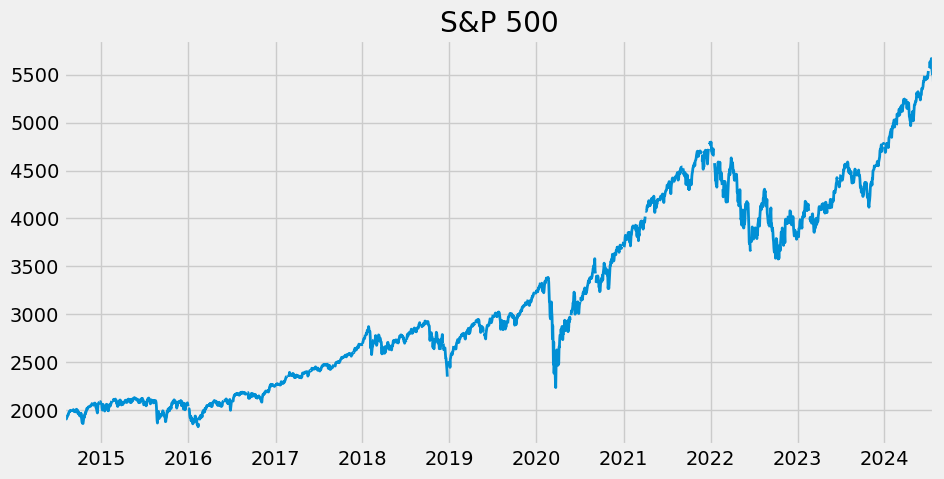

In [6]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# 4. Pull and Join Multiple Data Series

In [7]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[(unemp_df['title'].str.contains('Unemployment Rate')) & (~unemp_df['title'].str.contains('-|,|Region|Division'))]

In [8]:
all_results = [fred.get_series(myid).to_frame(name=myid) for myid in unemp_df.index]
uemp_results = pd.concat(all_results, axis=1).drop(["M0892AUSM156SNBR", "M0892BUSM156SNBR", "PRUR"], axis=1) #2 were discontinued and 1 being Puerto Rico

In [9]:
uemp_states = uemp_results.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [10]:
uemp_states.head()

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Indiana,Louisiana,Hawaii,North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1


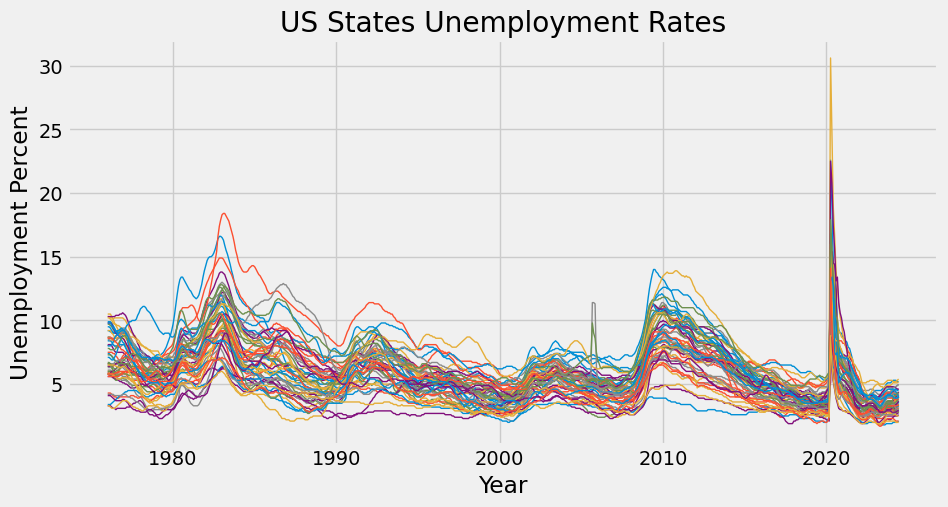

In [11]:
# Plot States Unemployment Rate
fig, ax = plt.subplots(figsize=(10, 5))

plt.plasma()
ax.plot(uemp_states, linewidth=1.0)

ax.set_title("US States Unemployment Rates")
ax.set_xlabel("Year")
ax.set_ylabel("Unemployment Percent")

plt.show()

## Pull April 2024 Unemployment Rate Per State

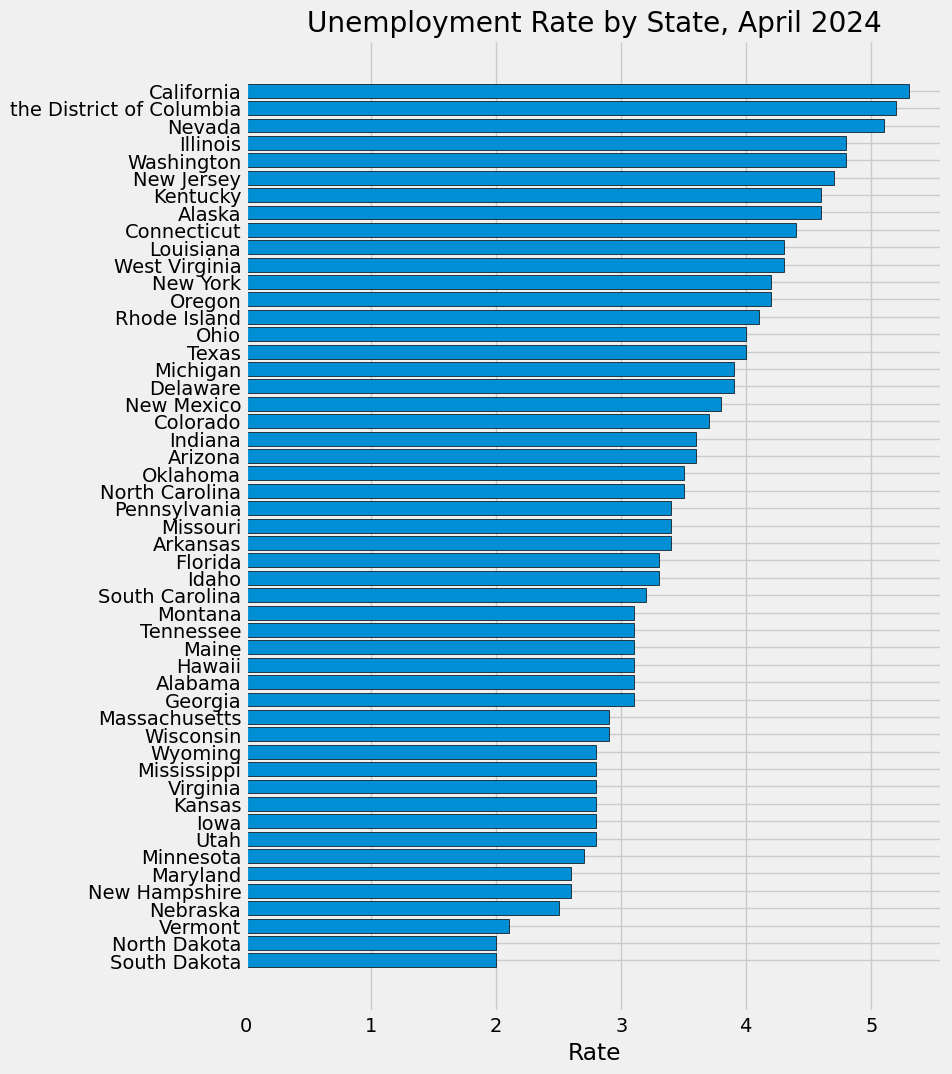

In [12]:
uemp_0424 = uemp_states.loc[['2024-04-01']].T.sort_values('2024-04-01')

fig, ax = plt.subplots(figsize=(8, 12))

hbars = ax.barh(
    uemp_0424.index,
    uemp_0424['2024-04-01'],
    height=.8,
    edgecolor='black',
    align='center'
)

ax.set_title('Unemployment Rate by State, April 2024')
ax.set_xlabel('Rate')

plt.show()

# Pull Participation Rate

In [13]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for ')]

In [14]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
part_results = [fred.get_series(myid).to_frame(name=myid) for myid in part_df.index]
part_states = pd.concat(part_results, axis=1)

# renaming columns to match state
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Plot Unemployment vs Participation

In [15]:
uemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Indiana,Louisiana,Hawaii,North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,5.3,3.9,4.4,3.1,3.4,3.7,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.5,4.1,3.0,3.0,4.4,3.1,3.9,2.7,3.3,4.7,2.4,4.2,4.3,5.2,3.6,3.6,3.3,4.6,3.0,2.8,3.5,4.2,3.1,2.0,3.4,5.1,3.1,3.4,2.5,4.5,3.3,2.6,3.9,2.7,2.8,4.0,2.3,2.1
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.7,3.8,3.0,2.9,4.5,3.1,3.8,2.7,3.2,4.8,2.5,4.2,4.3,5.1,3.5,3.5,3.3,4.6,2.9,2.8,3.5,4.4,3.1,2.0,3.3,5.2,3.0,3.3,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,3.6,4.3,3.1,2.0,3.1,5.2,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.6,4.9,4.6,3.2,3.8,3.4,2.9,2.7,4.6,3.4,3.8,2.8,3.0,4.9,2.7,4.2,4.2,5.1,3.4,3.5,3.5,4.5,2.8,2.9,3.7,4.1,3.0,2.0,3.1,5.3,2.8,3.0,2.5,4.3,3.3,2.5,4.3,2.9,2.9,3.9,2.1,2.0


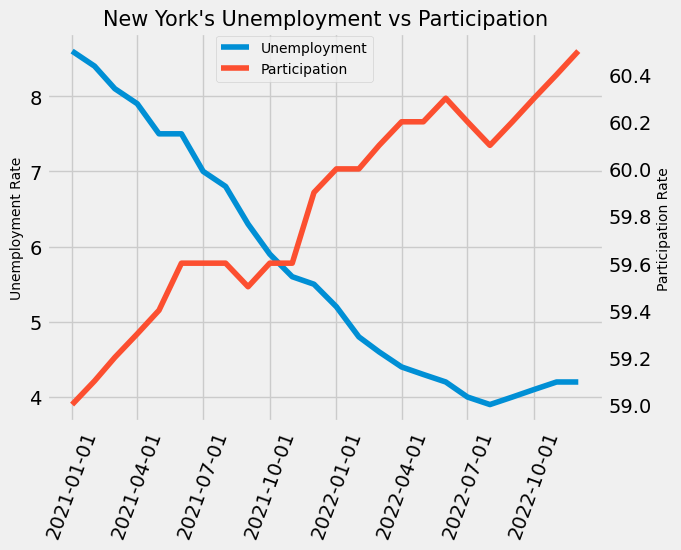

In [42]:
fig, ax = plt.subplots()

ax.plot(uemp_states.query('index >= 2021 and index < 2023')['New York'], label='Unemployment')
ax.set_title("New York's Unemployment vs Participation", fontsize=15)
ax.set_ylabel('Unemployment Rate', fontsize=10)
plt.xticks(rotation=70)

ax2 = ax.twinx()
ax2.plot(part_states.query('index >= 2021 and index < 2023')['New York'], label='Participation', color=color_pal[1])
ax2.grid(False)
ax2.set_ylabel('Participation Rate', fontsize=10)

ax.set_xticks(uemp_states.query('index >= 2021 and index < 2023').index[::3])

fig.legend(bbox_to_anchor=(.6, .89), fontsize=10)

plt.show()

In [26]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

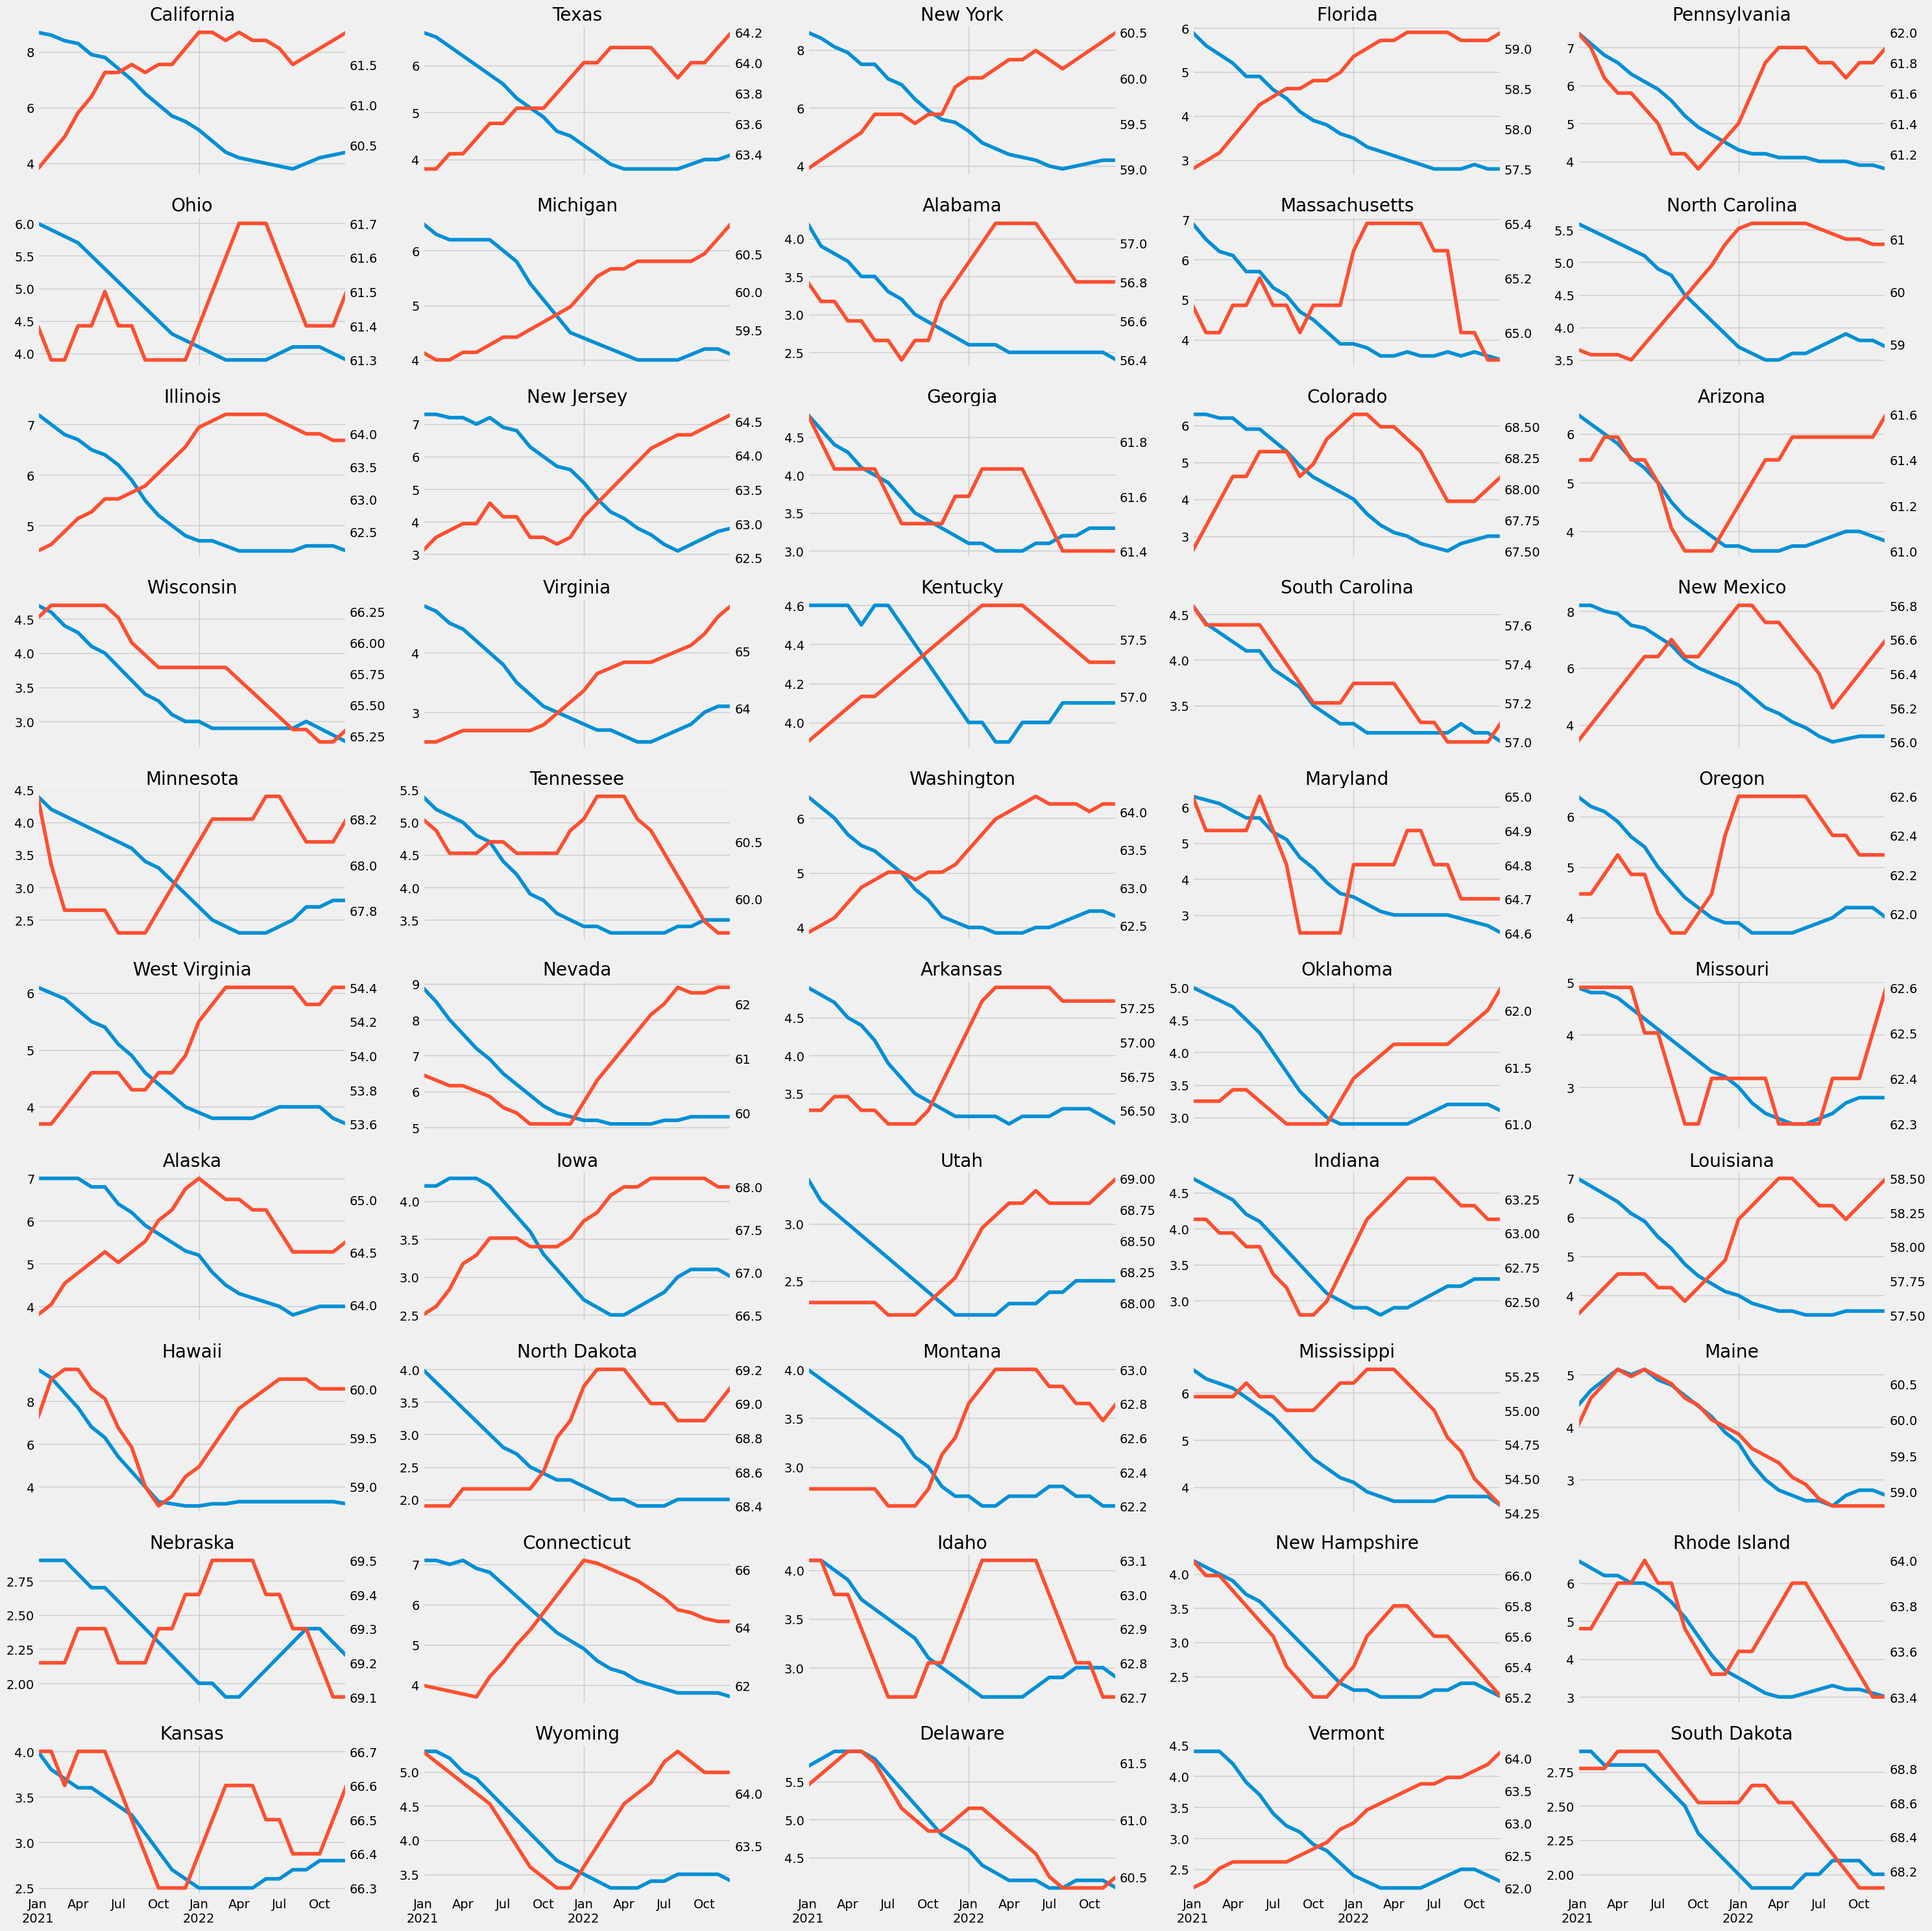

In [47]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs= axs.flatten()

i = 0
for state in uemp_states.columns:
    if state == "District Of Columbia":
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2021 and index < 2023')[state].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2021 and index < 2023')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()